<a href="https://colab.research.google.com/github/Visors/Mnist/blob/main/CNN/mnist-cnn-keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST CNN Keras

This is a simple example of a convolutional neural network (CNN) for classifying handwritten digits from the MNIST dataset using Keras.

## Import libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.18.0


## Load MNIST data

Load the MNIST dataset using the Keras API.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, sep="\n")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Visualize some data

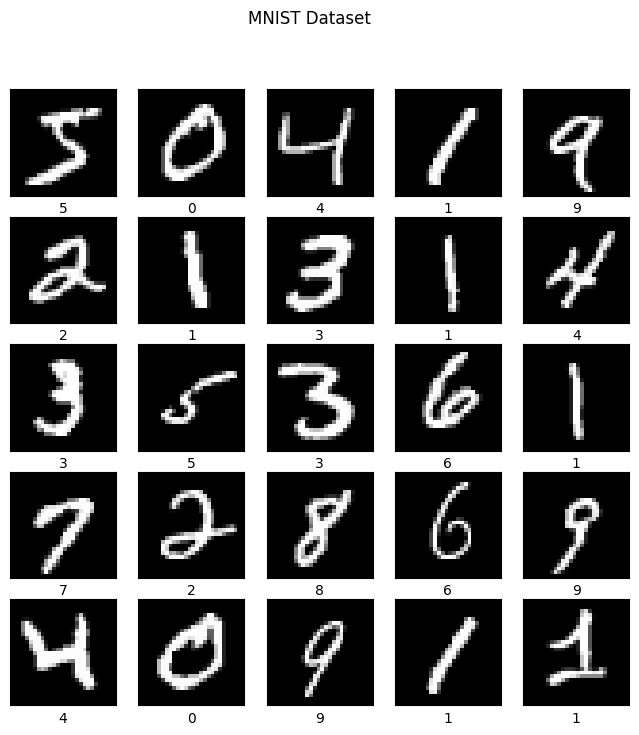

In [3]:
plt.figure(figsize=(8, 8))
plt.suptitle("MNIST Dataset")
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.imshow(x_train[i], cmap="gray")
    plt.xlabel(y_train[i])
plt.show()

## Data augmentation

Since the newer version of tensorflow decrepated the `ImageDataGenerator` class, we will use the Layers API to augment the data. To do this, build a image augmentator block.

In [4]:
img_height, img_width = 28, 28
data_augmentation = tf.keras.Sequential(
    [
        # tf.keras.layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)), # Don't do flip op since some digits may look similar to other after flip.
        # tf.keras.layers.Resizing(140, 140),
        tf.keras.layers.RandomBrightness(0.25),
        tf.keras.layers.RandomRotation(0.05, 'wrap', 'bilinear', None),
        tf.keras.layers.RandomZoom(0.1, 0.15),
    ]
)

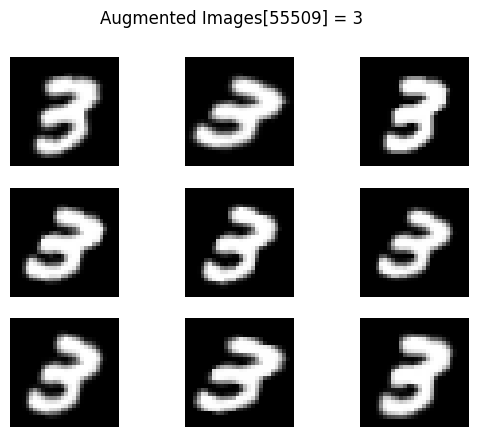

In [5]:
# have a look
x_train_index = np.random.randint(len(x_train))
# plt.figure(figsize=(8, 8))
plt.suptitle(f"Augmented Images[{x_train_index}] = {y_train[x_train_index]}")
for i in range(9):
    augmented_images = data_augmentation(x_train[x_train_index].reshape((1, 28, 28, 1)))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"), cmap='gray')
    plt.axis("off")

## Create the model

In [6]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same' , activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same' , activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same' , activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

## Compile the model

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(
    optimizer = optimizer,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

## Summary the model

In [8]:
cnn.summary(expand_nested=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_brightness               │ (1, 28, 28, 1)              │               0 │
│ (RandomBrightness)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_rotation                 │ (1, 28, 28, 1)              │               0 │
│ (RandomRotation)                     │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_zoom (RandomZoom)        │ (1, 28, 28, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 447,402 (1.71 MB)

 Trainable params: 447,402 (1.71 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [9]:
batch_size = 128
epochs = 30

initial_weights = cnn.get_weights()

cnn.set_weights(initial_weights)
history = cnn.fit(
    x_train, y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split = 0.2,
    shuffle = True
)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7531 - loss: 0.7402 - val_accuracy: 0.9798 - val_loss: 0.0665
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9651 - loss: 0.1166 - val_accuracy: 0.9853 - val_loss: 0.0502
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9763 - loss: 0.0797 - val_accuracy: 0.9872 - val_loss: 0.0459
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9805 - loss: 0.0665 - val_accuracy: 0.9886 - val_loss: 0.0434
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9834 - loss: 0.0541 - val_accuracy: 0.9887 - val_loss: 0.0461
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9843 - loss: 0.0527 - val_accuracy: 0.9902 - val_loss: 0.0383
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9876 - loss: 0.0432 - val_accuracy: 0.9902 - val_loss: 0.0400
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9880 - loss: 0.0392 - val_acc

## Visualize training result

Text(0.5, 1.0, 'Training and Validation Accuracy')

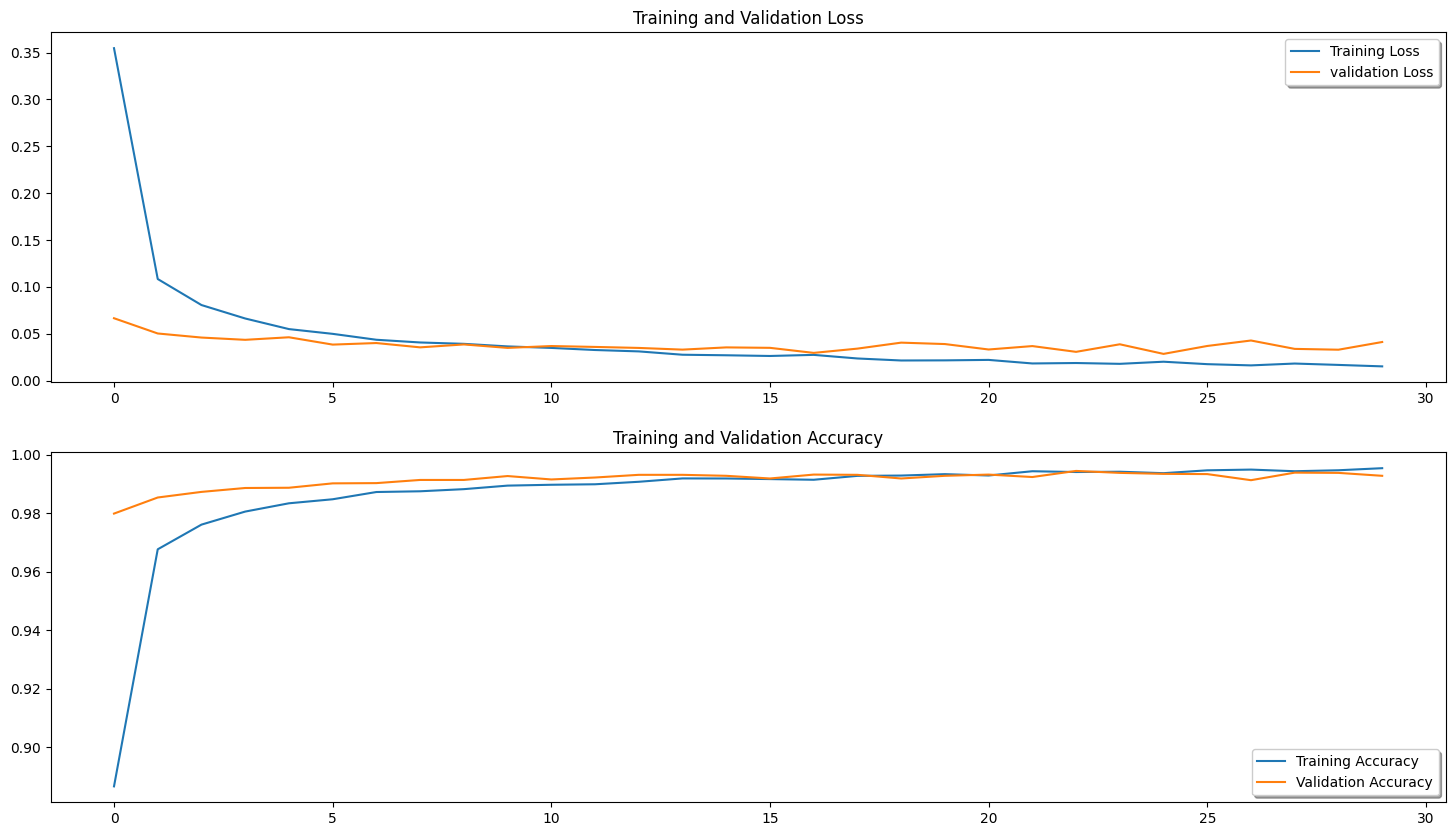

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(loss, label="Training Loss")
ax[0].plot(val_loss, label="validation Loss")
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set_title("Training and Validation Loss")

ax[1].plot(acc, label="Training Accuracy")
ax[1].plot(val_acc, label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Training and Validation Accuracy')

可以看到模型在训练后期的学习率过高，导致损失上下波动，而且可能有过拟合的现象。

## Drive training phase

In [26]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience = 10,
    restore_best_weights = True,
    mode="max",
    verbose = 1,
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_accuracy',
    factor = 0.1,
    patience = 5,
    min_lr = 1e-6,
    verbose = 1
)

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(
    optimizer = optimizer,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

batch_size = 128
epochs = 50

cnn.set_weights(initial_weights)
history = cnn.fit(
    x_train, y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    shuffle = True,
    callbacks = [early_stop, reduce_lr],
)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7580 - loss: 0.7348 - val_accuracy: 0.9812 - val_loss: 0.0674 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9656 - loss: 0.1208 - val_accuracy: 0.9868 - val_loss: 0.0500 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9753 - loss: 0.0821 - val_accuracy: 0.9879 - val_loss: 0.0442 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9808 - loss: 0.0636 - val_accuracy: 0.9878 - val_loss: 0.0454 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9814 - loss: 0.0597 - val_accuracy: 0.9903 - val_loss: 0.0414 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9836 - loss: 0.0517 - val_accuracy: 0.9912 - val_loss: 0.0357 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9849 - loss: 0.04

## Evaluate the model

Text(0.5, 1.0, 'Training and Validation Accuracy')

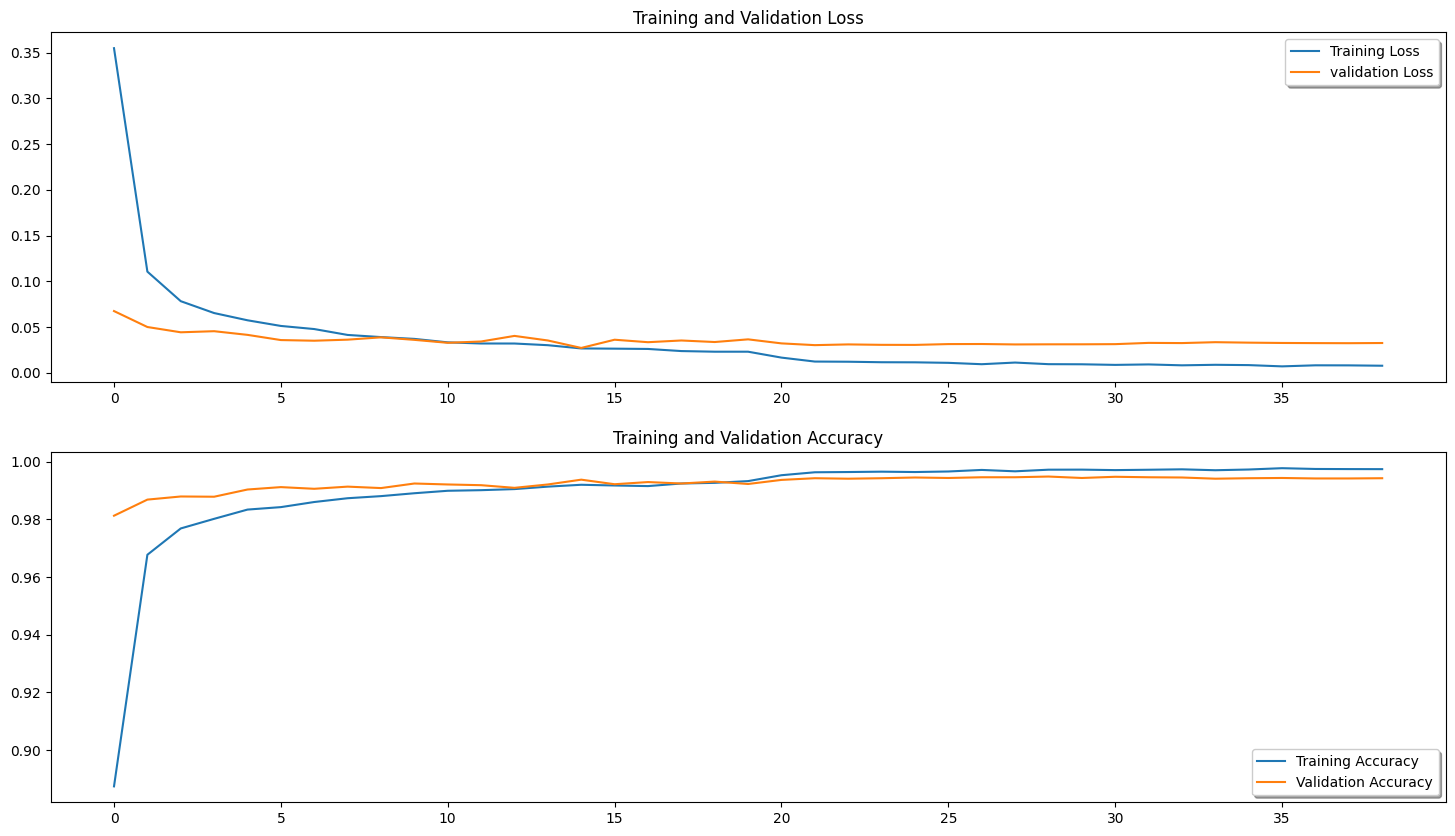

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(loss, label="Training Loss")
ax[0].plot(val_loss, label="validation Loss")
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set_title("Training and Validation Loss")

ax[1].plot(acc, label="Training Accuracy")
ax[1].plot(val_acc, label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Training and Validation Accuracy')

### Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 978    0    0    0    0    0    1    0    0    1]
 [   0 1130    1    0    0    0    2    2    0    0]
 [   1    0 1029    0    0    0    0    2    0    0]
 [   0    1    0 1006    0    2    0    0    1    0]
 [   0    0    0    0  978    0    0    0    0    4]
 [   0    0    0    6    0  884    2    0    0    0]
 [   1    2    0    0    1    3  950    0    1    0]
 [   0    1    5    0    0    0    0 1021    0    1]
 [   0    0    2    1    0    1    0    0  970    0]
 [   0    0    0    0    5    2    0    2    1  999]]


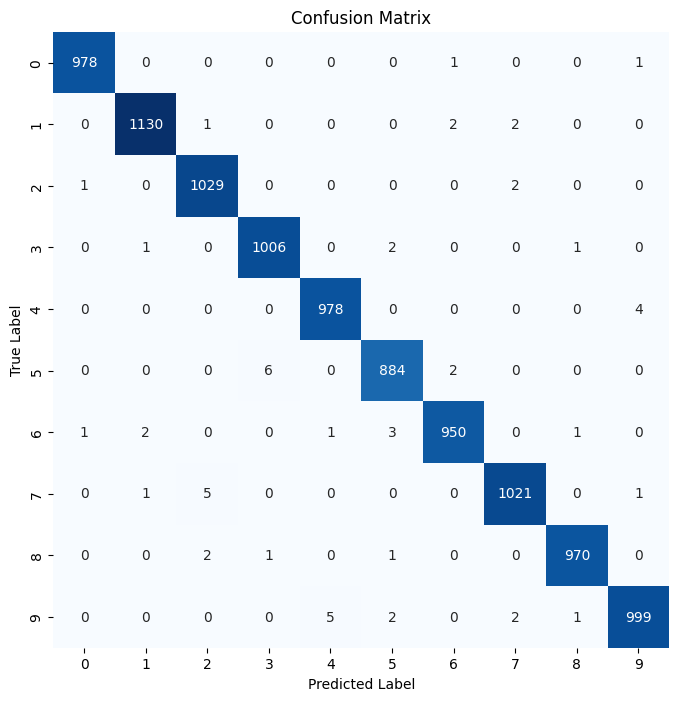

In [30]:
y_pred = cnn.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap='Blues', fmt='.0f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show();

### Predict my handwriting

In [ ]:
import os
import glob


def predict_handwriting(model_path, image_folder):
    # Load trained model
    saved_model = tf.keras.models.load_model(model_path)

    # Get all images' paths
    image_paths = glob.glob(os.path.join(image_folder, "*.png")) + \
                  glob.glob(os.path.join(image_folder, "*.jpg")) + \
                  glob.glob(os.path.join(image_folder, "*.jpeg"))

    if not image_paths:
        print(f"No images found in {image_folder}")
        return

    # Create layout (at most 5 cols per row)
    num_images = len(image_paths)
    cols = 5
    rows = int(np.ceil(num_images / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
    if rows == 1:
        axes = axes.reshape(1, -1)

    # Set title
    fig.suptitle("Handwriting Digit Recognition Results", fontsize=16, y=1.02)

    for idx, img_path in enumerate(image_paths):
        try:
            # Preprocess image
            img = Image.open(img_path).convert('L') # transform to grayscale
            img = img.resize((28, 28))              # resize to 28x28
            img_array = np.array(img)               # transform to array

            # Normalization (cope with both black and white background)
            if 255.0 - img_array[0][0] <= 10:
                img_array = (255 - img_array) / 255.0   # if input is white background black word
            else:
                img_array = img_array / 255.0           # if input is black background white word

            # Reshape to fit MLP
            input_data = img_array.astype("float32").reshape(1, 784)

            # Make prediction
            predictions = saved_model.predict(input_data, verbose=0)
            pred_class = np.argmax(predictions)
            confidence = np.max(predictions)

            # Plot result
            ax = axes[idx // cols, idx % cols]
            ax.imshow(img, cmap='gray') # Show image
            ax.set_title(f"Pred: {pred_class}\nProb: {confidence:.2f}")
            ax.axis("off")

        except Exception as e:
            print(f"Error processing {os.path.basename(img_path)}: {str(e)}")

    # Hide empty axes
    for j in range(len(image_paths), rows * cols):
        axes[j // cols, j % cols].axis("off")

    plt.tight_layout()
    plt.show()